# Question D12

*Question*: Considering the ML-enabled system projects in which you participated, to which application domains are they related?

*Answer Type*: Multiple Option and Free Field

*Options*: [Banking/Financial, Defense & Security, Education, Embedded systems in Automotive or Avionics,
Entertainment, Healthcare, Insurance, Logistics, Oil & Gas, Sales/E-commerce, Telecommunication, Others]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values, format_wordcloud_text
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# For PROFES, we discarded suspended submissions (e.g., remove those who didn't complete the survey).
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

In [4]:
# question options
domains = {
    'D12_ML_Project_Context_Banking': 'Banking',
    'D12_ML_Project_Context_Defense': 'Defense',
    'D12_ML_Project_Context_Education': 'Education',
    'D12_ML_Project_Context_Embedded': 'Embedded',
    'D12_ML_Project_Context_Entertainment': 'Entertainment',
    'D12_ML_Project_Context_Healthcare': 'Healthcare',
    'D12_ML_Project_Context_Insurance': 'Insurance',
    'D12_ML_Project_Context_Logistics': 'Logistics',
    'D12_ML_Project_Context_Oil': 'Oil',
    'D12_ML_Project_Context_Sales': 'Sales',
    'D12_ML_Project_Context_Tellecom': 'Tellecom',
    'D12_ML_Project_Context_Others': 'Others'
}

### Basic Analysis

In [5]:
dataframe_obj.df[['D12_ML_Project_Context_Banking', 'D12_ML_Project_Context_Defense', 
                  'D12_ML_Project_Context_Education', 'D12_ML_Project_Context_Embedded', 
                  'D12_ML_Project_Context_Entertainment', 'D12_ML_Project_Context_Healthcare', 
                  'D12_ML_Project_Context_Insurance', 'D12_ML_Project_Context_Logistics',
                  'D12_ML_Project_Context_Oil', 'D12_ML_Project_Context_Sales', 
                  'D12_ML_Project_Context_Tellecom', 'D12_ML_Project_Context_Others', 
                  'D12_ML_Project_Context_Others_Free']].head()

,D12_ML_Project_Context_Banking,D12_ML_Project_Context_Defense,D12_ML_Project_Context_Education,D12_ML_Project_Context_Embedded,D12_ML_Project_Context_Entertainment,D12_ML_Project_Context_Healthcare,D12_ML_Project_Context_Insurance,D12_ML_Project_Context_Logistics,D12_ML_Project_Context_Oil,D12_ML_Project_Context_Sales,D12_ML_Project_Context_Tellecom,D12_ML_Project_Context_Others,D12_ML_Project_Context_Others_Free
0,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
1,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,Human Resources
2,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,quoted,not quoted,not quoted,quoted,Meteorology
3,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,-99
4,quoted,quoted,quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,quoted,innovation


In [6]:
indexes = []
values = []
chart_positions = []
for domain in domains:
    indexes.append(domains[domain])
    values.append(dataframe_obj.df[domain].value_counts()['quoted'])
    chart_positions.append(1 if 'Others' not in domain else 0)

In [7]:
# compute total of unique answers in this question
total = 0
for idx, row in dataframe_obj.df.iterrows():
    
    if row['D12_ML_Project_Context_Banking'] == 'quoted' or row['D12_ML_Project_Context_Defense'] == 'quoted' or row['D12_ML_Project_Context_Education'] == 'quoted' or row['D12_ML_Project_Context_Embedded'] == 'quoted' or row['D12_ML_Project_Context_Entertainment'] == 'quoted' or row['D12_ML_Project_Context_Healthcare'] == 'quoted' or row['D12_ML_Project_Context_Insurance'] == 'quoted' or row['D12_ML_Project_Context_Logistics'] == 'quoted' or row['D12_ML_Project_Context_Oil'] == 'quoted' or row['D12_ML_Project_Context_Sales'] == 'quoted' or row['D12_ML_Project_Context_Tellecom'] == 'quoted' or row['D12_ML_Project_Context_Others'] == 'quoted':
        total += 1

total_answers = 'N = ' + str(total)
total_answers_int = total

In [8]:
# plot object
d12_plot = PlotUtils(pd.DataFrame(
    data={'Domain': indexes, 'Answers': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Answers'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


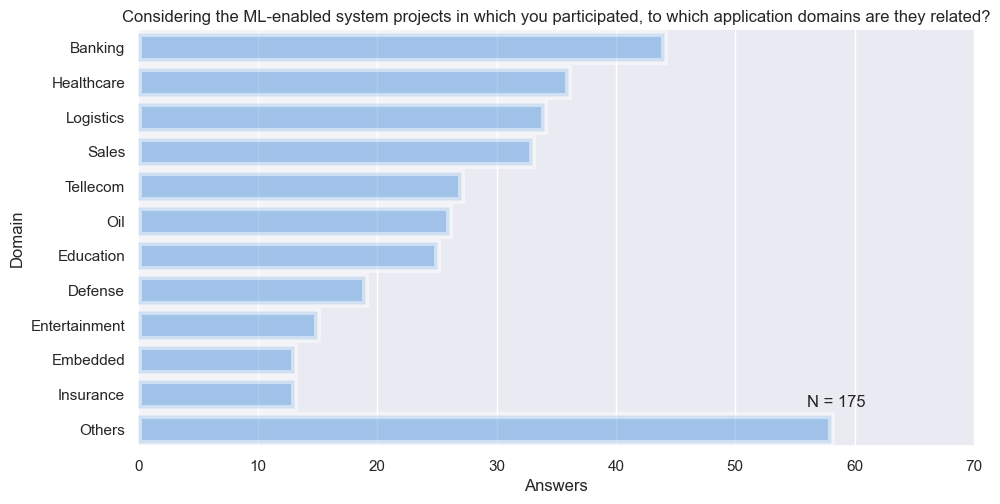

In [9]:
d12_plot.single_barplot(x_axis="Answers", y_axis="Domain",
                       title="Considering the ML-enabled system projects in which you participated, to which application domains are they related?",
                       x_label="Answers", y_label="Domain", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

#### WordCloud

In [10]:
# remove unnecessary values
domains_free = list(filter(lambda a: str(a) != '-99', 
                           list(dataframe_obj.df['D12_ML_Project_Context_Others_Free'])))
domains_free = list(filter(lambda a: str(a) != 'nan', domains_free))

In [11]:
domains_words = format_wordcloud_text(texts=domains_free, use_sep=False)

In [12]:
# plot object
d12_wc_plot = PlotUtils(pd.DataFrame(
    data={'Word': list(domains_words.keys()), 'Weight': list(domains_words.values())}
))

In [26]:
domains_words

{'Human Resources ': 1,
 'Meteorology': 1,
 'innovation': 1,
 'Data analysis for autonomous driving': 1,
 'Pricing': 1,
 'Human Resources': 1,
 'Electricity Sector': 1,
 'Compliance': 1,
 'Automotive': 1,
 'Sistemas de internet das coisas ': 1,
 'Physics': 1,
 'Manufacturing': 2,
 'mobile apps': 1,
 'Sport': 1,
 'Sports': 3,
 'Sports, Production': 1,
 'Energia imbalance': 1,
 'Kamu Kurumu Projesi': 1,
 'Energy management': 1,
 'System aimed at information security of companies in general.': 1,
 'Network security': 1,
 'SPORTS': 1,
 'Gaming and Marketing': 1,
 'Virtual Assistants': 1,
 'Research': 1,
 'Smart Home': 1,
 'Energy': 4,
 'Consumer goods industry': 1,
 'Manufacturing (computer vision for defect detection)': 1,
 'computer vision': 1,
 'Production': 2,
 'Fraud Prevention': 1,
 'Ad marketing, ERP, production management': 1,
 'Smart Grid': 1,
 'Content Moderation': 1,
 'Accessibility': 1,
 'Agriculture': 1,
 'r&d': 1,
 'Science': 1,
 'Fraud prevention': 1,
 'Government': 1,
 'Law

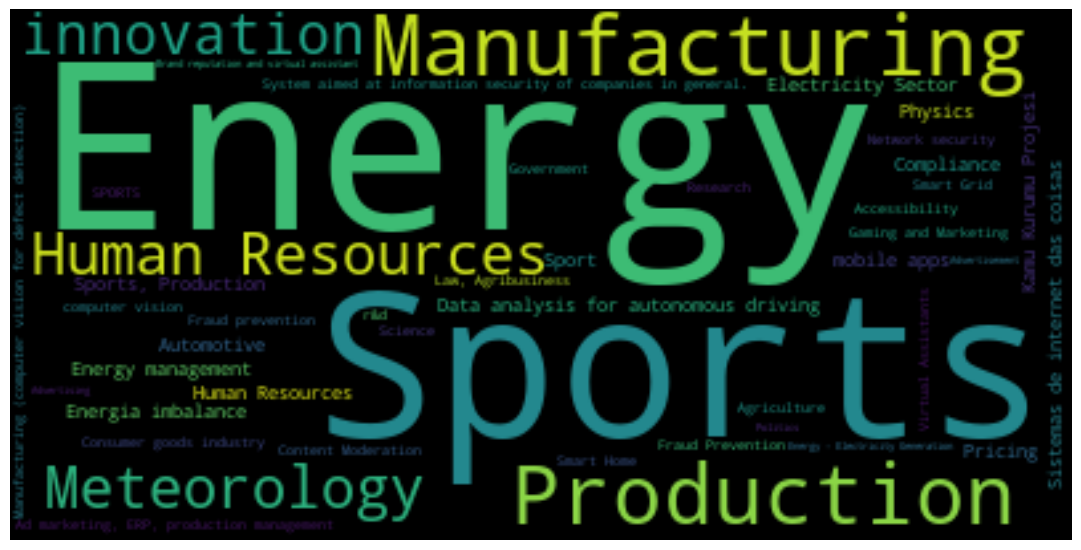

In [14]:
d12_wc_plot.wordcloud("Word", 'Weight')

### Bootstrapping Analysis

In [15]:
prefix = "D12_ML_Project_Context_"

In [16]:
# the possible answers are the ones in columns
valid_options_list = [domain_column.split(prefix)[1] for domain_column in domains]

In [17]:
# answers could be composed by more than one option, so we will have an array of selected options
valid_answers_list = []
for idx, row in dataframe_obj.df.iterrows():
    answer = []
    for option in valid_options_list:
        if row[prefix + option] == 'quoted':
            answer.append(option)
    
    valid_answers_list.append(answer)

In [18]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)

In [19]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping(question_type="multiple")

In [20]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
chart_positions = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']
    chart_positions += [1 if 'Others' not in idx else 0 for _ in range(len(bootstrapped_dict_data[idx]['population']))]

In [21]:
# plot object for bootstrapped data
d12_boot_plot = PlotUtils(pd.DataFrame(
    data={'Domain': indexes, 'Value': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Value'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


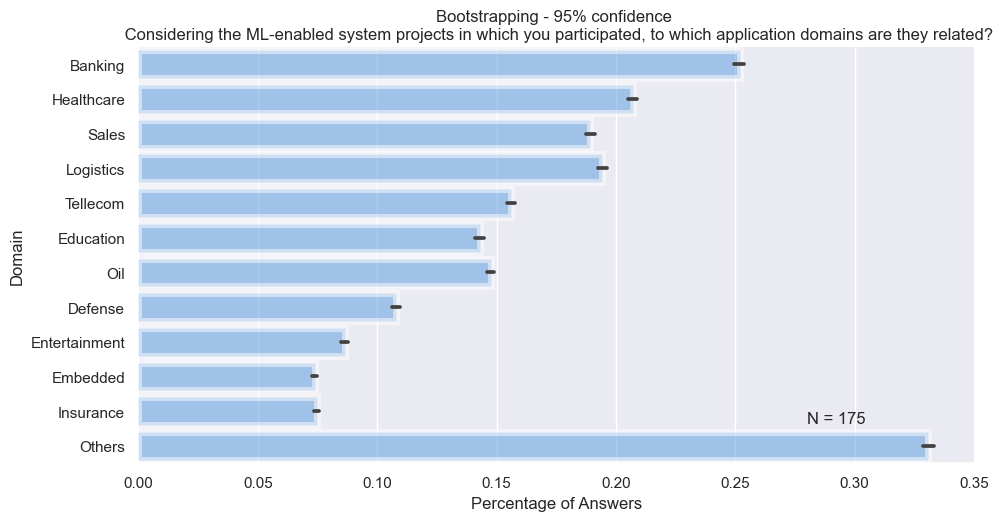

In [22]:
d12_boot_plot.single_barplot(x_axis="Value", y_axis="Domain", 
                       title="Bootstrapping - 95% confidence \n Considering the ML-enabled system projects in which you participated, to which application domains are they related?",
                       x_label="Percentage of Answers", y_label="Domain", x_label_rotation=0, color="#429bf5",
                       total_answers=total_answers)

In [23]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
Banking:(0.24980558925352137, 0.2518114285714286, 0.2538172678893358)
Defense:(0.10641653443241603, 0.10794857142857142, 0.10948060842472682)
Education:(0.1411595831228469, 0.14296571428571428, 0.14477184544858165)
Embedded:(0.07261300621371784, 0.07382285714285713, 0.07503270807199643)
Entertainment:(0.08500885405168497, 0.08635999999999999, 0.08771114594831501)
Healthcare:(0.20509391678452088, 0.2069771428571429, 0.2088603689297649)
Insurance:(0.07342439336383857, 0.07461142857142855, 0.07579846377901853)
Logistics:(0.19253153569508505, 0.1943771428571429, 0.19622275001920073)
Oil:(0.14592777708480664, 0.14750857142857143, 0.14908936577233622)
Sales:(0.18754705056626184, 0.18934285714285717, 0.1911386637194525)
Tellecom:(0.1545019914931479, 0.15612571428571428, 0.15774943707828068)
Others:(0.3287684600152086, 0.33092, 0.3330715399847914)


In [24]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':: P = ' + str(round((bootstrapped_dict_data[idx]['confidence'][1] * 100), 3)) + " [" + str(round((bootstrapped_dict_data[idx]['confidence'][0] * 100), 3)) + ", " + str(round((bootstrapped_dict_data[idx]['confidence'][2] * 100), 3)) + "]")

Option: (Lower Value, Mean, Upper Value)
Banking:: P = 25.181 [24.981, 25.382]
Defense:: P = 10.795 [10.642, 10.948]
Education:: P = 14.297 [14.116, 14.477]
Embedded:: P = 7.382 [7.261, 7.503]
Entertainment:: P = 8.636 [8.501, 8.771]
Healthcare:: P = 20.698 [20.509, 20.886]
Insurance:: P = 7.461 [7.342, 7.58]
Logistics:: P = 19.438 [19.253, 19.622]
Oil:: P = 14.751 [14.593, 14.909]
Sales:: P = 18.934 [18.755, 19.114]
Tellecom:: P = 15.613 [15.45, 15.775]
Others:: P = 33.092 [32.877, 33.307]
